In [3]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def get_plots(adj, ax):
    edges = [(int(k), int(v)) for k, l in adj.items() for v in l]
    all_nodes = {int(k) for k in adj}
    all_nodes = sorted(all_nodes)

    for a, b in edges:
        k1, k2 = all_nodes.index(a), all_nodes.index(b)
        degs = [k1/(len(all_nodes)) * 2 * np.pi, k2/(len(all_nodes)) * 2 * np.pi]
        ax.plot(np.cos(degs), np.sin(degs))
    for node in all_nodes:
        deg = all_nodes.index(node)/(len(all_nodes)) * 2 * np.pi
        c, s = np.cos(deg)*1.1, np.sin(deg)*1.1
        ax.text(c, s, node,
                horizontalalignment = 'center',
                verticalalignment = 'center')
    t = np.linspace(0, 2*np.pi, 100)

In [5]:
figs_path = os.path.join(os.getcwd(), 'figs')

In [11]:
with open(os.path.join(os.getcwd(),'data.json'), 'r') as f:
    adj = json.load(f)

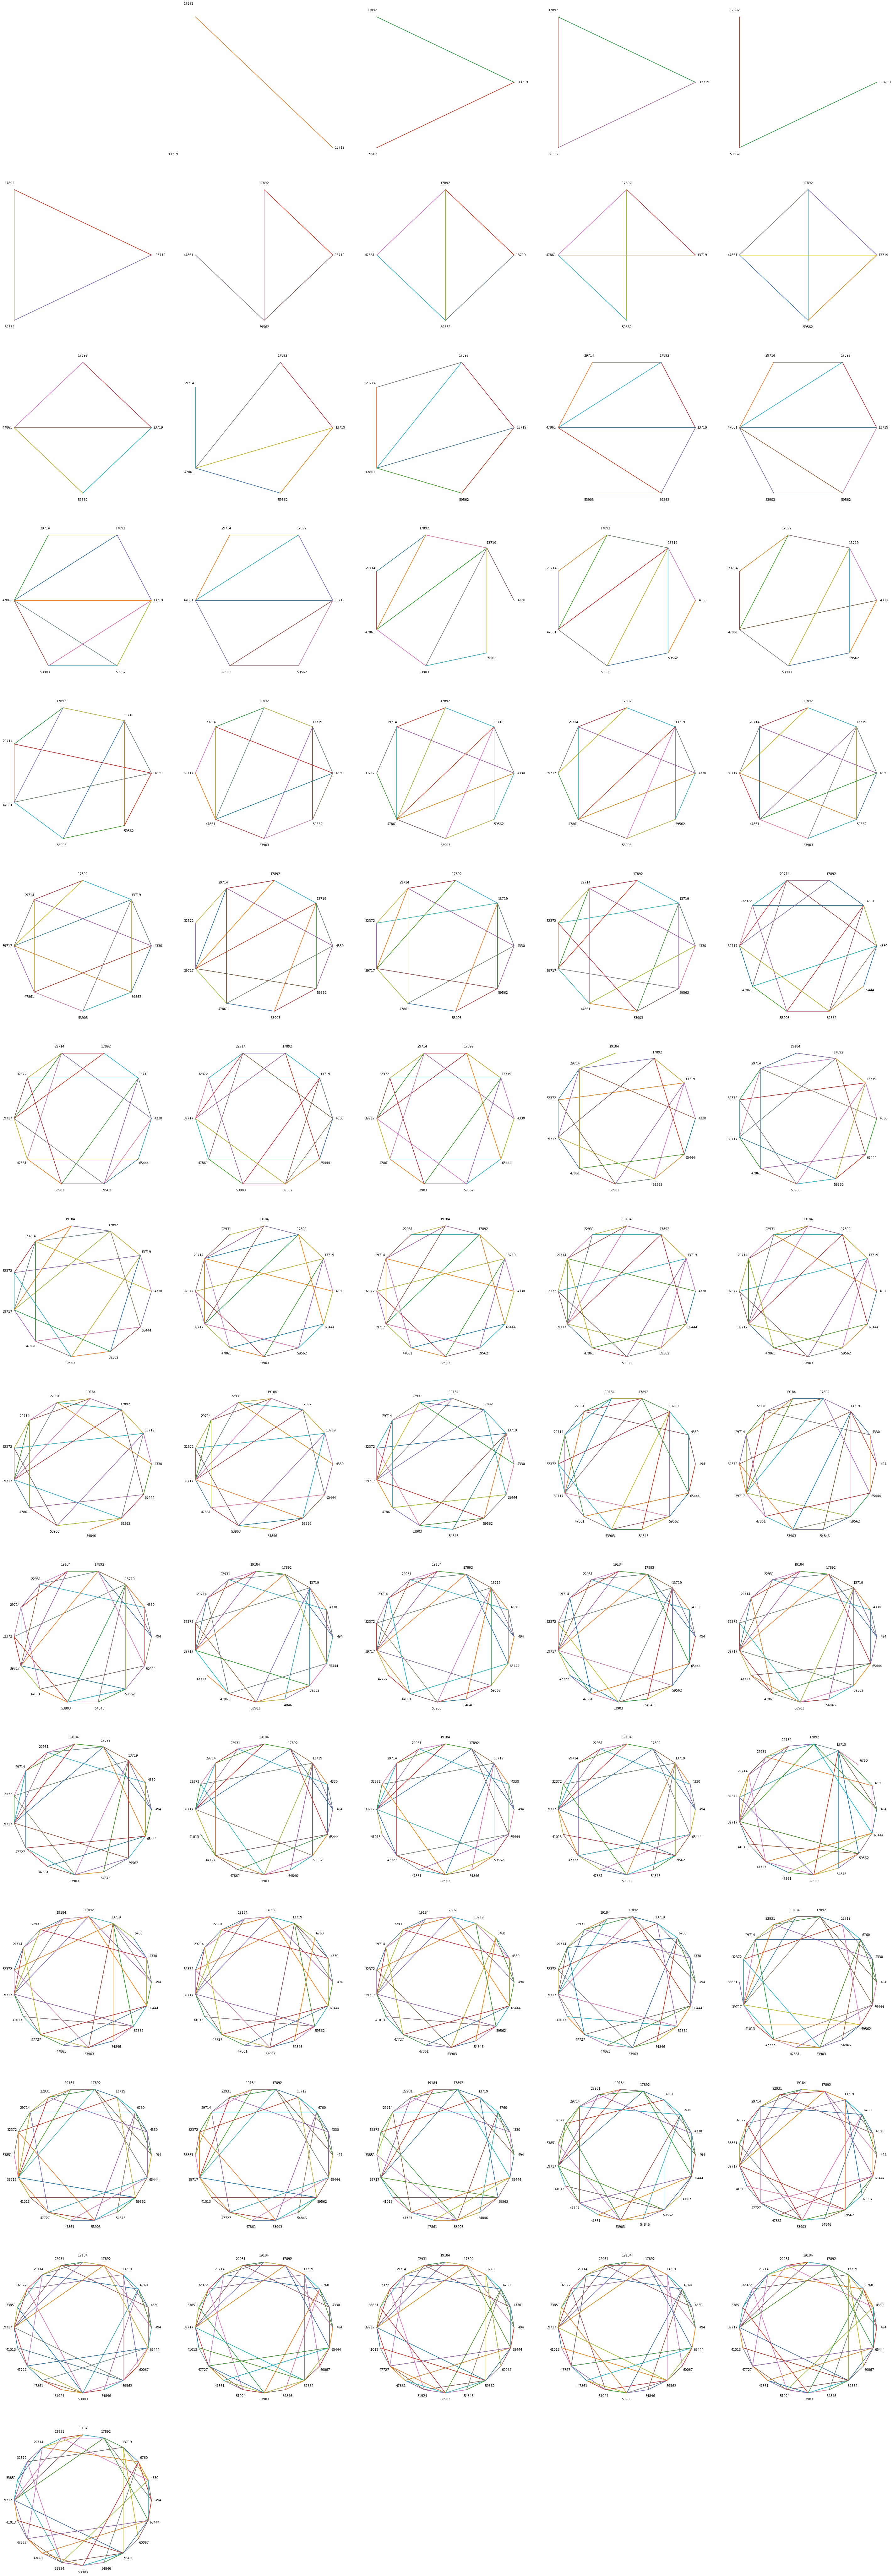

In [13]:
fig, ax = plt.subplots(int(np.ceil(len(adj)/5)), 5, figsize=(50,2*(len(adj) + 5 - (len(adj) % 5))))
for a, axi in zip(adj, ax.flatten()):
    get_plots(a, axi)
for axi in ax.flatten():
    axi.axis('off')
plt.savefig(os.path.join(figs_path, 'chord-fingers.png'))
plt.show()

In [9]:
def check_good(adj):
    m = 8
    #check that each person has good finger table.
    edges = [(int(k), int(v)) for k, l in adj.items() for v in l]
    all_nodes = {int(k) for k in adj}
    all_nodes = sorted(all_nodes)
    should = {}
    for node in all_nodes:
        should[node] = set()
        #make sure that finger table is right.
        connected = {int(k) for k in adj[str(node)]}
        #want to check that all fingers are in adj[node]
        rotated_nodes = [(n - node) % 4**m for n in all_nodes]
        my_index = rotated_nodes.index(0)
        rotated_nodes = rotated_nodes[my_index+1:] + rotated_nodes[:my_index]
        for i in range(m):
            plus = 4 ** i
            #get node that is >= plus+node
            #do rotation
            for ele in rotated_nodes:
                if ele >= plus:
                    should[node].add((ele+node) % 4 ** m)
                    break
        if len(should[node] - connected) > 0:
            return
    should_edges = set()
    for k, set_conns in should.items():
        for v in set_conns:
            should_edges.add((k, v))
            should_edges.add((v, k))
    set_edges = set(edges)
    print(len(set_edges))
    print(len(should_edges))
    print(set_edges - should_edges)
    if set_edges != should_edges:
        print('bad')
        return should_edges
    print('good')

In [12]:
check_good(adj[-1])

106
106
set()
good


In [118]:
13719-4330

9389

In [121]:
print([4330 + 4 ** i for i in range(8)])

[4331, 4334, 4346, 4394, 4586, 5354, 8426, 20714]
